In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lumpy_skin_symptoms_dataset.csv')

In [ ]:

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # MobileNetV2 preprocessing
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 749 images belonging to 2 classes.
Found 187 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_11[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    validation_steps=val_generator.samples//val_generator.batch_size
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6384 - loss: 0.7384 - val_accuracy: 0.8438 - val_loss: 0.3439
Epoch 2/20
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7188 - loss: 0.4596

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 352ms/step - accuracy: 0.7188 - loss: 0.4596 - val_accuracy: 0.8500 - val_loss: 0.3698
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 666ms/step - accuracy: 0.7927 - loss: 0.4759 - val_accuracy: 0.8875 - val_loss: 0.3265
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.7812 - loss: 0.4528 - val_accuracy: 0.8500 - val_loss: 0.3586
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 607ms/step - accuracy: 0.8254 - loss: 0.4361 - val_accuracy: 0.8625 - val_loss: 0.3343
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.7812 - loss: 0.4714 - val_accuracy: 0.8875 - val_loss: 0.3060
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 787ms/step - accuracy: 0.8181 - loss: 0.3674 - val_accuracy: 0.9062 - val_loss: 0.2982
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.8438 - loss: 0.3417 - val_accuracy: 0.9000 - val_loss: 0.3044
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 903ms/step - accuracy: 0.8467 - loss: 0.3592 - val_accuracy: 0.9125 - 

In [ ]:
val_generator.reset()
y_true = val_generator.classes
y_pred_prob = model.predict(val_generator, steps=val_generator.samples//val_generator.batch_size+1)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Healthy','Diseased']))

print("F1 Score:", f1_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step

Confusion Matrix:
[[96  7]
 [10 74]]

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.91      0.93      0.92       103
    Diseased       0.91      0.88      0.90        84

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187

F1 Score: 0.896969696969697
Recall: 0.8809523809523809
Precision: 0.9135802469135802


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step


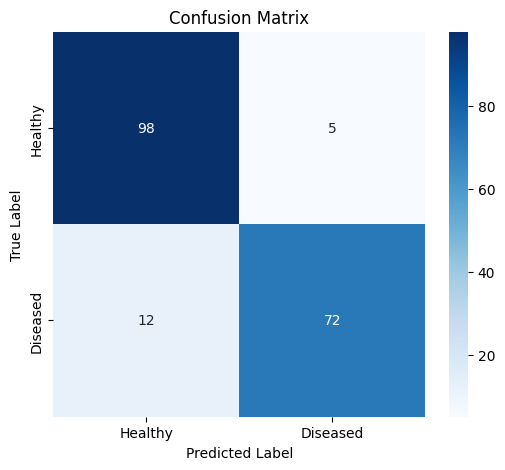

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = val_generator.classes
y_pred_prob = model.predict(val_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

cm = confusion_matrix(y_true, y_pred)
classes = ['Healthy', 'Diseased']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [77]:
import csv
import random

In [78]:
symptoms = ["Fever", "Anorexia", "Nasal_discharge", "Lacrimation",
            "Conjunctivitis", "Edema", "Pneumonia", "Skin_nodules"]

regions = ["Reproductive", "Skin", "Skin/udder", "Eyes",
           "Respiratory", "Lymphatic", "Oral_cavity", "Systemic"]

severities = ["Mild", "Moderate", "Severe"]
stages = ["Incubation", "Early_Clinical", "Progressive", "Recovery"]

rows = []

In [79]:
for _ in range(3000):  # increased dataset size
    stage = random.choices(stages, weights=[0.2, 0.3, 0.3, 0.2])[0]
    features = {sym: 0 for sym in symptoms}

    if stage == "Incubation":
        for sym in symptoms:
            features[sym] = random.choices([0,1], [0.95,0.05])[0]
        affected = random.choice(regions)
        severity = "Mild"

    elif stage == "Early_Clinical":
        for sym in symptoms:
            features[sym] = random.choices([0,1,2], [0.4,0.4,0.2])[0]
        affected = random.choice(["Respiratory","Eyes","Oral_cavity","Skin"])
        severity = random.choice(["Mild","Moderate"])

    elif stage == "Progressive":
        for sym in symptoms:
            features[sym] = random.choices([1,2], [0.3,0.7])[0]
        affected = random.choice(["Systemic","Lymphatic","Skin/udder"])
        severity = random.choice(["Moderate","Severe"])

    elif stage == "Recovery":
        for sym in symptoms:
            features[sym] = random.choices([0,1], [0.75,0.25])[0]
        affected = random.choice(["Skin","Respiratory","Oral_cavity","Eyes"])
        severity = "Mild"

    row = [features[sym] for sym in symptoms] + [affected, severity, stage]
    rows.append(row)

In [80]:
with open("disease_stage_dataset.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(symptoms + ["Affected_Region","Severity","Disease_Stage"])
    writer.writerows(rows)

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
df = pd.read_csv("disease_stage_dataset.csv")

In [83]:
X = df.drop("Disease_Stage", axis=1)
y = df["Disease_Stage"]

In [84]:
X = pd.get_dummies(X, columns=["Affected_Region","Severity"])

In [85]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

rf = RandomForestClassifier(
    n_estimators=1000, max_depth=25, min_samples_leaf=2,
    class_weight="balanced", random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=2, n_estimators=1000, random_state=42)

In [87]:
y_pred = rf.predict(X_test)

In [90]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 91.33%
Confusion Matrix:
[[156   0   0  12]
 [  0  99   0  28]
 [  0   0 187   0]
 [  1  11   0 106]]
Classification Report:
                precision    recall  f1-score   support

Early_Clinical       0.99      0.93      0.96       168
    Incubation       0.90      0.78      0.84       127
   Progressive       1.00      1.00      1.00       187
      Recovery       0.73      0.90      0.80       118

      accuracy                           0.91       600
     macro avg       0.90      0.90      0.90       600
  weighted avg       0.92      0.91      0.92       600



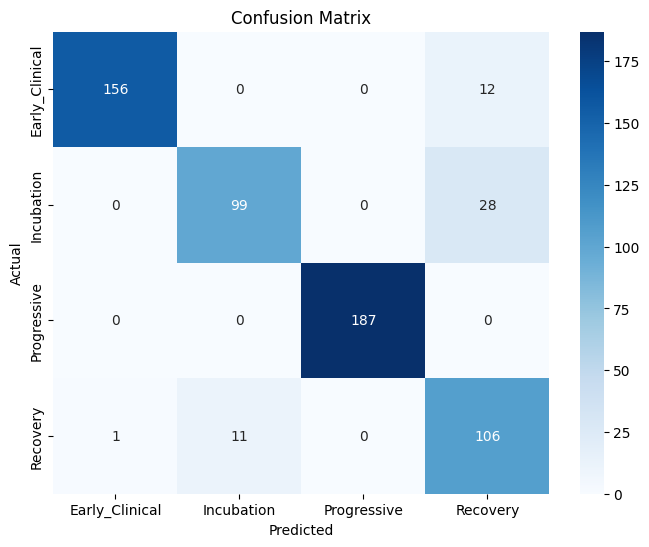

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_true, y_pred)

labels = le.classes_

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
